### Random Forest Regression

In [10]:
# Import packages
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
# Read the prepared features file
zacs_features1 = pd.read_csv("zacs_features1.csv", index_col=0)

In [5]:
# Splitting training and testing data
zacs_features1_train = zacs_features1[zacs_features1['Year'] <2018]
zacs_features1_test = zacs_features1[zacs_features1['Year'] == 2018]

In [4]:
print(zacs_features1_train.shape)   # 73% train set
print(zacs_features1_test.shape)    #27% test set

(123310, 33)
(32414, 33)


In [6]:
# X and Y of train and test datasets
zf1X_train = zacs_features1_train.drop(["RegionName", "ZORI"], axis =1)
zf1y_train = zacs_features1_train['ZORI']
zf1X_test = zacs_features1_test.drop(["RegionName", "ZORI"], axis =1)
zf1y_test = zacs_features1_test['ZORI']

In [13]:
# RandomFirest fit with default parameters
randomForest = RandomForestRegressor()
randomForest.set_params(random_state =2)
randomForest.fit(zf1X_train, zf1y_train) 

RandomForestRegressor(random_state=2)

In [14]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [15]:
#Scores for train and test sets
print("The training R2 is: %.5f" % (randomForest.score(zf1X_train, zf1y_train)))
print("The test R2 is: %.5f" % (randomForest.score(zf1X_test, zf1y_test)))

The training R2 is: 0.99785
The test R2 is: 0.91880


In [16]:
#Predicted Price from test dataset w.r.t Random Forest Regression
zf1y_predict = randomForest.predict((zf1X_test))

#Model Evaluation using R2 for Random Forest Regression
from sklearn import metrics
R2 = metrics.r2_score(zf1y_test, zf1y_predict)
print('R2 associated with Random Forest Regression is:', R2) 

R2 associated with Random Forest Regression is: 0.918803954248911


In [17]:
# 1st grid search
randomForest = RandomForestRegressor()
randomForest.set_params(random_state =2)
grid_para_forest = {
    'criterion': ['mse'],  
    'n_estimators': list(range(100, 500, 100)),
    'max_depth': list(range(2, 17, 3)),
    'bootstrap':[True]
}

In [18]:
# Run RF regressor through the grid search
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_forest.fit(zf1X_train, zf1y_train)

CPU times: user 6min 21s, sys: 1.85 s, total: 6min 23s
Wall time: 1h 5min 3s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [2, 5, 8, 11, 14],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True)

In [19]:
# get the best parameters
grid_search_forest.best_params_

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 14, 'n_estimators': 400}

In [20]:
# get the best score
grid_search_forest.best_score_

0.797424958231038

In [21]:
grid_search_forest.cv_results_

{'mean_fit_time': array([ 27.91879983,  60.52137938,  97.53740239, 134.28807917,
         77.31781034, 156.27215729, 231.50712066, 298.11777234,
        103.52009392, 195.1845149 , 286.65865335, 375.83951025,
        117.00534992, 239.69361916, 388.7561337 , 474.7354341 ,
        132.49343357, 274.43812141, 393.07983465, 434.54534883]),
 'std_fit_time': array([2.11810694e-02, 1.63094821e+00, 1.58042399e+00, 1.83933765e+00,
        1.08431499e+00, 1.81820258e+00, 1.59115329e+00, 5.28252886e+00,
        6.53352576e+00, 5.68336620e-01, 1.91266173e+00, 2.78445297e+00,
        1.19652163e+00, 1.19998509e+01, 2.39358645e+00, 1.44605982e+01,
        3.60808639e+00, 1.22240565e+00, 3.55058714e+00, 5.84686152e+01]),
 'mean_score_time': array([0.06749845, 0.12165885, 0.1737401 , 0.23308005, 0.10594363,
        0.1709125 , 0.25109205, 0.29641767, 0.11621437, 0.22628064,
        0.30991616, 0.41238627, 0.14802799, 0.34242487, 0.42810163,
        0.57693286, 0.19660935, 0.353654  , 0.48315907, 0.41

In [22]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_forest.best_estimator_.score(zf1X_train, zf1y_train))) 
print("The R2 test     is: %.5f" % (grid_search_forest.best_estimator_.score(zf1X_test, zf1y_test)))

The R2 training is: 0.98957
The R2 test     is: 0.91295


In [23]:
# Feature Importance
tree_final = grid_search_forest.best_estimator_
feature_importance = list(zip(zf1X_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('owner_occupied_housing_units_median_value', 0.6552737734928735),
 ('renter_occupied_housing_units_paying_cash_median_gross_rent',
  0.15554798471676898),
 ('median_age', 0.018604579319091163),
 ('dwellings_1_units_detached', 0.016206846620571973),
 ('gini_index', 0.012875741293446092),
 ('dwellings_1_units_attached', 0.012553156651004347),
 ('commuters_by_public_transportation', 0.010850942666711421),
 ('dwellings_50_or_more_units', 0.009388605254287847),
 ('housing_units_renter_occupied', 0.009088752210784206),
 ('median_income', 0.008771504835085188),
 ('white_pop', 0.007298234457794992),
 ('occupation_natural_resources_construction_maintenance',
  0.0061451676993701555),
 ('hispanic_pop', 0.006053345422757463),
 ('commute_10_14_mins', 0.005700384359109234),
 ('total_pop', 0.005367183957446542),
 ('vacant_housing_units_for_rent', 0.005250530331976691),
 ('dwellings_20_to_49_units', 0.004898052746602246),
 ('employed_information', 0.004588974824454051),
 ('nonfamily_households', 0.

<BarContainer object of 31 artists>

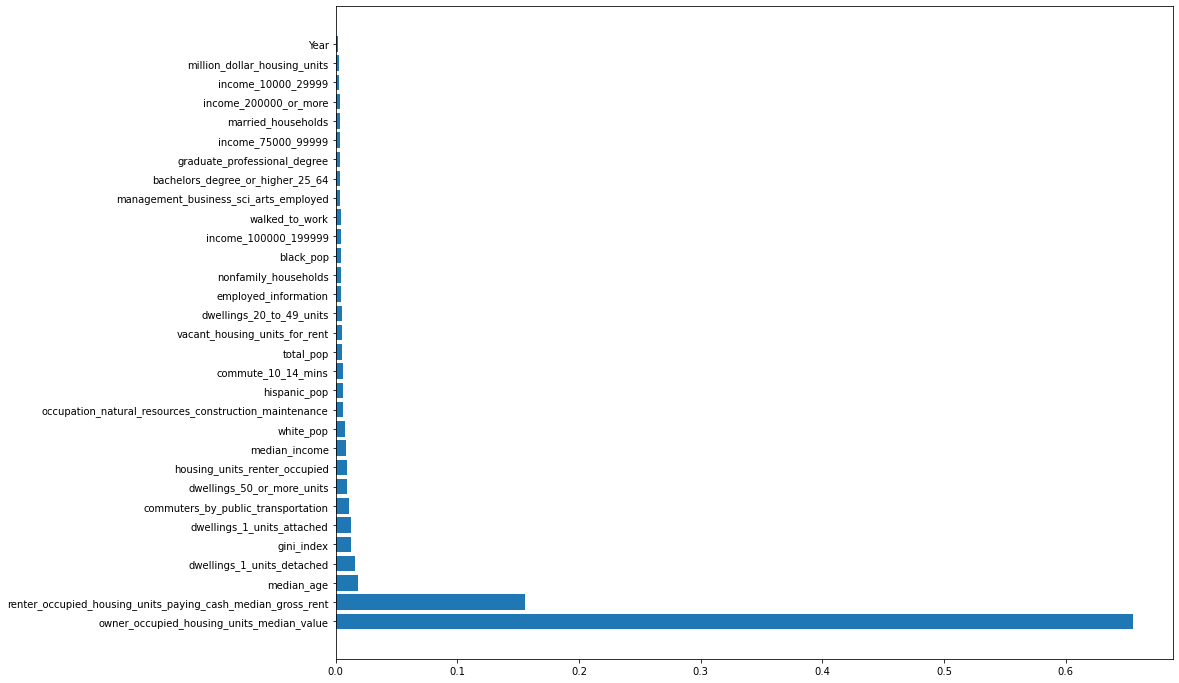

In [24]:
#Feature Importance Bar plot
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(15,12))
plt.barh(features, importance)

In [29]:
#Predicted Price from test dataset w.r.t Random Forest Regression
zf1yGS_predict = np.around(grid_search_forest.predict((zf1X_test)))

In [27]:
zf1yGS_predict

array([3079.13839088, 3079.13839088, 3079.13839088, ..., 2684.02238745,
       2684.02238745, 2684.02238745])

In [30]:
# Created a CSV file with actual and predicted values of Model RF
modelRF_pred = zacs_features1_test.copy()
modelRF_pred['Predicted'] = zf1yGS_predict.copy()
modelRF_pred= modelRF_pred[['RegionName','Year', 'ZORI', 'Predicted']]
modelRF_pred.to_csv("modelRF_pred.csv")

In [31]:
# RMSE for model RF
np.around(mean_squared_error(zf1y_test,grid_search_forest.predict(zf1X_test), squared = False))

188.0

### Random Forest on features taken from 4 datasets including ZORI, ACS, Education, HPI features

In [32]:
zacseh= pd.read_csv("zacs_edu_hpi.csv", index_col=0)

In [33]:
# Splitting training and testing data
zacseh_train = zacseh[zacseh['Year'] <2018]
zacseh_test = zacseh[zacseh['Year'] == 2018]

In [34]:
print(zacseh_train.shape)   # 80% train set
print(zacseh_test.shape)    #20% test set

(144034, 38)
(27524, 38)


In [35]:
# X and Y of train and test datasets
zacsehX_train = zacseh_train.drop(["RegionName", "ZORI"], axis =1)
zacsehy_train = zacseh_train['ZORI']
zacsehX_test = zacseh_test.drop(["RegionName", "ZORI"], axis =1)
zacsehy_test = zacseh_test['ZORI']

In [40]:
# Random Forest fit with default parameters
zacseh_randomForest = RandomForestRegressor()
zacseh_randomForest.set_params(random_state =2)
zacseh_randomForest.fit(zacsehX_train, zacsehy_train) 

RandomForestRegressor(random_state=2)

In [41]:
#Scores for train and test sets
print("The training R2 is: %.5f" % (zacseh_randomForest.score(zacsehX_train, zacsehy_train)))
print("-" * 30)
print("The test R2 is: %.5f" % (zacseh_randomForest.score(zacsehX_test, zacsehy_test)))

The training R2 is: 0.99998
------------------------------
The test R2 is: 0.95774


In [42]:
# Grid Search for dataset with additional features from EDu and HPI(ZORI + ACS+ Edu+ HPI)
zacseh_randomForest = RandomForestRegressor()
zacseh_randomForest.set_params(random_state =2)
grid_para_zacseh = {
    'criterion': ['mse'],  
    'n_estimators': list(range(100, 500, 100)),
    'max_depth': list(range(2, 17, 3)),
    'bootstrap':[True]
}

In [43]:
# Run RF regressor through the grid search
grid_search_zacseh = GridSearchCV(zacseh_randomForest, grid_para_zacseh, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_zacseh.fit(zacsehX_train, zacsehy_train)

CPU times: user 2min 55s, sys: 1.19 s, total: 2min 56s
Wall time: 6h 12min 35s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_depth': [2, 5, 8, 11, 14],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True)

In [46]:
# get the best parameters
grid_search_zacseh.best_params_

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 14, 'n_estimators': 100}

In [47]:
# get the best score
grid_search_zacseh.best_score_

0.6707832146076658

In [48]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_zacseh.best_estimator_.score(zacsehX_train, zacsehy_train))) 
print("The R2 test     is: %.5f" % (grid_search_zacseh.best_estimator_.score(zacsehX_test, zacsehy_test)))

The R2 training is: 0.99695
The R2 test     is: 0.95536


In [49]:
# Feature Importance
tree_final = grid_search_zacseh.best_estimator_
feature_importance = list(zip(zacsehX_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('owner_occupied_housing_units_median_value', 0.37509136888880656),
 ('bachelors_degree_or_higher_25_64', 0.22404070625043582),
 ('management_business_sci_arts_employed', 0.21644901946177178),
 ('renter_occupied_housing_units_paying_cash_median_gross_rent',
  0.0836737317237678),
 ('median_age', 0.015763506968555926),
 ('RegionID', 0.010789867431525024),
 ('hispanic_pop', 0.00604024022440181),
 ('median_income', 0.004331896544735165),
 ('HPI', 0.0036927125585566735),
 ('white_pop', 0.0035391400415276174),
 ('dwellings_50_or_more_units', 0.003318839812460847),
 ('dwellings_1_units_detached', 0.003208483220167159),
 ('walked_to_work', 0.003196854853989872),
 ('dwellings_1_units_attached', 0.003002287647392017),
 ('gini_index', 0.0029915766302773057),
 ('commuters_by_public_transportation', 0.002960808516313796),
 ('commute_10_14_mins', 0.0028932168170290157),
 ('occupation_natural_resources_construction_maintenance',
  0.0026698600964741998),
 ('black_pop', 0.0025115001673997922),
 ('va

<BarContainer object of 36 artists>

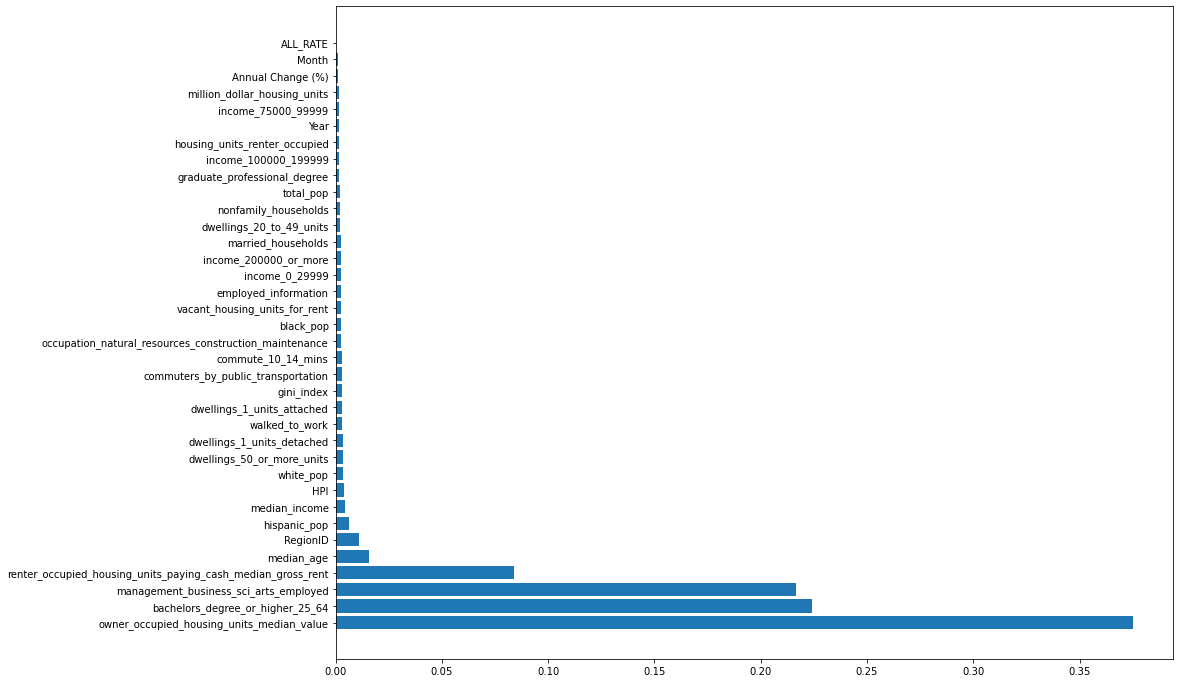

In [50]:
#Feature Importance Bar plot
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(15,12))
plt.barh(features, importance)

In [53]:
# Needed to remove"RegionID" also from the feature space, which I forgot to do in the last run
# X and Y of train and test datasets
zacsehX_train = zacseh_train.drop(["RegionName", "RegionID", "ZORI"], axis =1)
zacsehy_train = zacseh_train['ZORI']
zacsehX_test = zacseh_test.drop(["RegionName", "RegionID", "ZORI"], axis =1)
zacsehy_test = zacseh_test['ZORI']

In [54]:
# 2nd GridSearch 
# set the parameter grid
grid_para_zacseh = {
    'criterion': ['mse'], 
    'min_samples_split': [2, 12, 25, 37 ,50], #use min_samples_split instead of setting value to max_depth 
    'n_estimators': [100], # 1st GridSearch best_param gave 'n_estimators': 100 so we leave it as is.  
    'bootstrap':[True],
    'max_features': [2,6,15,30]   #changed from default of 40 in 1st GridSearch to this. 
}


In [55]:
# run the RF regressor through the grid search 
grid_search_zacseh = GridSearchCV(
    zacseh_randomForest, grid_para_zacseh, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_zacseh.fit(zacsehX_train, zacsehy_train)  

CPU times: user 52.8 s, sys: 656 ms, total: 53.4 s
Wall time: 1h 6min 10s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [2, 6, 15, 30],
                         'min_samples_split': [2, 12, 25, 37, 50],
                         'n_estimators': [100]},
             return_train_score=True)

In [56]:
# get the best parameters
grid_search_zacseh.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 15,
 'min_samples_split': 2,
 'n_estimators': 100}

In [57]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_zacseh.best_estimator_.score(zacsehX_train, zacsehy_train))) 
print("The R2 test     is: %.5f" % (grid_search_zacseh.best_estimator_.score(zacsehX_test, zacsehy_test)))

The R2 training is: 0.99996
The R2 test     is: 0.93517


In [58]:
# get the best score
grid_search_zacseh.best_score_

0.7041283583761474

In [59]:
# Feature Importance
tree_final = grid_search_zacseh.best_estimator_
feature_importance = list(zip(zacsehX_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('owner_occupied_housing_units_median_value', 0.2348711948722335),
 ('management_business_sci_arts_employed', 0.17424803694302568),
 ('renter_occupied_housing_units_paying_cash_median_gross_rent',
  0.1283072746805435),
 ('bachelors_degree_or_higher_25_64', 0.052599880093551626),
 ('million_dollar_housing_units', 0.049749716425997875),
 ('median_income', 0.03661611656115907),
 ('occupation_natural_resources_construction_maintenance', 0.0328631222765865),
 ('median_age', 0.030354344451536164),
 ('married_households', 0.02153491014546918),
 ('total_pop', 0.01734654286963179),
 ('graduate_professional_degree', 0.017035721573946),
 ('dwellings_20_to_49_units', 0.01665881123271914),
 ('dwellings_1_units_attached', 0.01663120744557263),
 ('HPI', 0.015718777127683593),
 ('income_200000_or_more', 0.014629409236477552),
 ('nonfamily_households', 0.013957733686758223),
 ('commuters_by_public_transportation', 0.013315475629443128),
 ('commute_10_14_mins', 0.011386158297305072),
 ('dwellings_1_un

<BarContainer object of 35 artists>

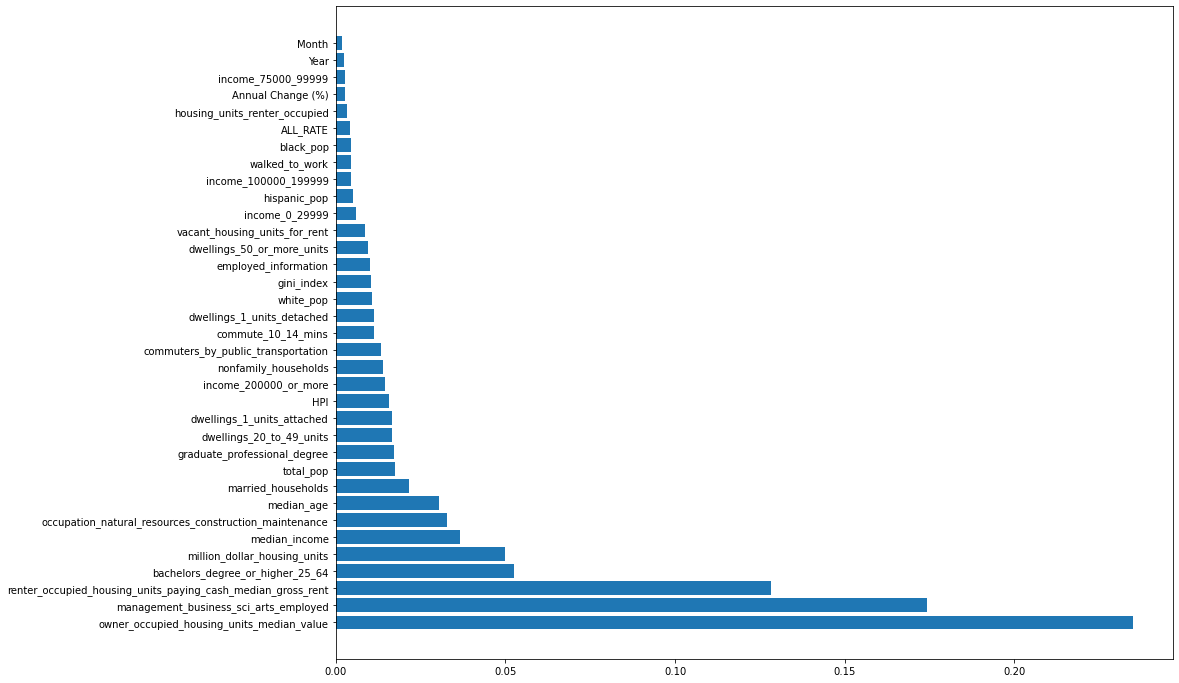

In [60]:
#Feature Importance Bar plot
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(15,12))
plt.barh(features, importance)

In [62]:
# RMSE for model with features from all 4 datasets
np.around(mean_squared_error(zacsehy_test,grid_search_zacseh.predict(zacsehX_test), squared = False))

209.0

In [66]:
#Predicted Price from test dataset w.r.t Created a CSV file with actual and predicted values of Model RF
modelzacsehRF_pred = zacseh_test.copy()
modelzacsehRF_pred['Predicted'] =  np.around(grid_search_zacseh.predict(zacsehX_test))
modelzacsehRF_pred= modelzacsehRF_pred[['RegionName','Year', 'ZORI', 'Predicted']]
modelzacsehRF_pred.to_csv("modelzacsehRF_pred.csv")

### Dropping high-priced rentals and re-running this

In [73]:
# Taken ZORI values<6000
zacseh_no_outliers = zacseh[zacseh['ZORI']<6000]

In [74]:
print(zacseh.shape)
print(zacseh_no_outliers.shape)

(171558, 38)
(171445, 38)


In [75]:
# Splitting training and testing data
zacseh_no_outliers_train = zacseh_no_outliers[zacseh_no_outliers['Year'] <2018]
zacseh_no_outliers_test = zacseh_no_outliers[zacseh_no_outliers['Year'] == 2018]

In [77]:
print(zacseh_no_outliers_train.shape)   # 80% train set
print(zacseh_no_outliers_test.shape)    #20% test set

(143945, 38)
(27500, 38)


In [78]:
# X and Y of train and test datasets
zacseh_no_outliersX_train = zacseh_no_outliers_train.drop(["RegionName", "RegionID", "ZORI"], axis =1)
zacseh_no_outliersy_train = zacseh_no_outliers_train['ZORI']
zacseh_no_outliersX_test = zacseh_no_outliers_test.drop(["RegionName", "RegionID", "ZORI"], axis =1)
zacseh_no_outliersy_test= zacseh_no_outliers_test['ZORI']

In [80]:
zacsehNO_randomForest = RandomForestRegressor()
zacsehNO_randomForest.set_params(random_state =2)

RandomForestRegressor(random_state=2)

In [79]:
# GridSearch for dataset with removed outliers
# set the parameter grid
grid_para_zacsehNO = {
    'criterion': ['mse'], 
    'min_samples_split': [2, 12, 25, 37 ,50], #use min_samples_split instead of setting value to max_depth 
    'n_estimators': [100], # 1st GridSearch best_param gave 'n_estimators': 100 so we leave it as is.  
    'bootstrap':[True],
    'max_features': [2,6,15,30]   #changed from default of 40 in 1st GridSearch to this. 
}

In [82]:
# run the RF regressor through the grid search 
grid_search_zacsehNO = GridSearchCV(
    zacsehNO_randomForest, grid_para_zacsehNO, cv=5, n_jobs=-1, return_train_score=True)
%time grid_search_zacsehNO.fit(zacseh_no_outliersX_train, zacseh_no_outliersy_train) 

CPU times: user 59 s, sys: 1.03 s, total: 1min
Wall time: 1h 47min 5s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['mse'],
                         'max_features': [2, 6, 15, 30],
                         'min_samples_split': [2, 12, 25, 37, 50],
                         'n_estimators': [100]},
             return_train_score=True)

In [85]:
# get the best parameters
grid_search_zacsehNO.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_features': 15,
 'min_samples_split': 2,
 'n_estimators': 100}

In [86]:
# get the training/test scores
print("The R2 training is: %.5f" % (grid_search_zacsehNO.best_estimator_.score(zacseh_no_outliersX_train, zacseh_no_outliersy_train))) 
print("The R2 test     is: %.5f" % (grid_search_zacsehNO.best_estimator_.score(zacseh_no_outliersX_test, zacseh_no_outliersy_test)))

The R2 training is: 0.99997
The R2 test     is: 0.93734


In [88]:
# get the best score
grid_search_zacsehNO.best_score_

0.8244085513515212

In [89]:
# Feature Importance
tree_final = grid_search_zacsehNO.best_estimator_
feature_importance = list(zip(zacseh_no_outliersX_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('owner_occupied_housing_units_median_value', 0.4052008396668797),
 ('renter_occupied_housing_units_paying_cash_median_gross_rent',
  0.24056968201204332),
 ('million_dollar_housing_units', 0.06580843524468358),
 ('HPI', 0.049190447382062644),
 ('median_income', 0.035518796612995736),
 ('income_200000_or_more', 0.02663849338373217),
 ('commuters_by_public_transportation', 0.013564222176537834),
 ('hispanic_pop', 0.009995330729844636),
 ('dwellings_1_units_detached', 0.009860165018954585),
 ('dwellings_50_or_more_units', 0.00871826945057826),
 ('gini_index', 0.007933620437653397),
 ('white_pop', 0.007708975168555241),
 ('black_pop', 0.007530223349724782),
 ('walked_to_work', 0.007307454289040508),
 ('median_age', 0.0069753165088259576),
 ('income_100000_199999', 0.006655404084749264),
 ('dwellings_1_units_attached', 0.006442477177632431),
 ('vacant_housing_units_for_rent', 0.00643429035276978),
 ('occupation_natural_resources_construction_maintenance',
  0.006412722369591194),
 ('marri

<BarContainer object of 35 artists>

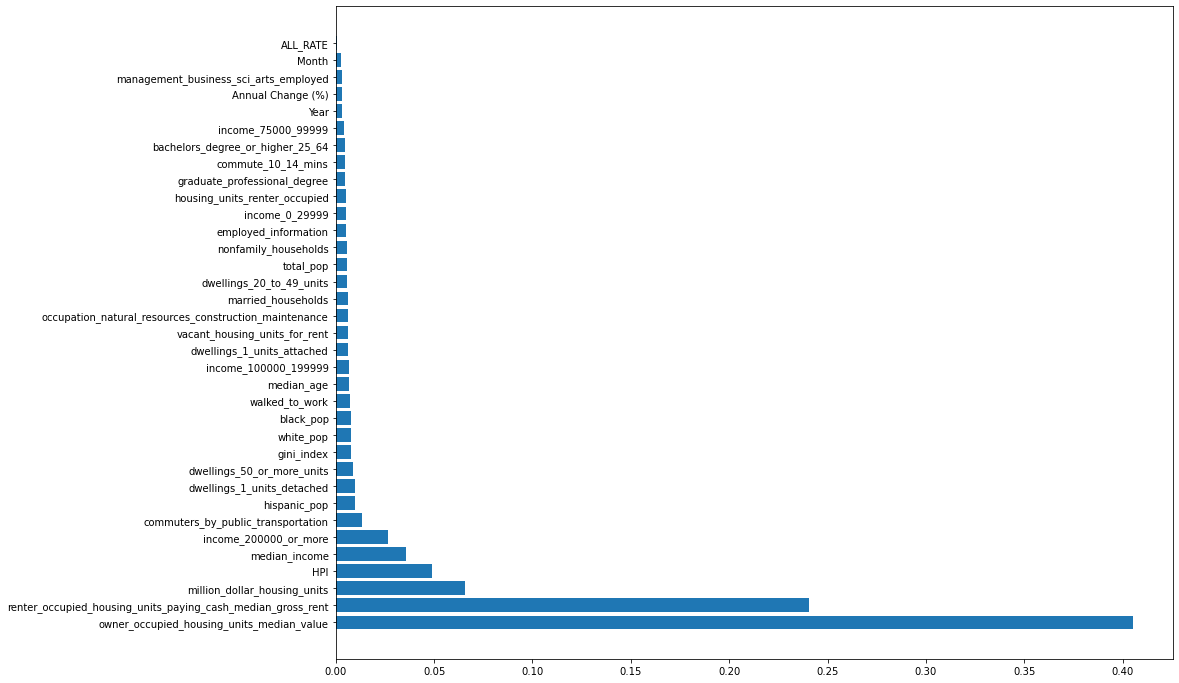

In [90]:
#Feature Importance Bar plot
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(15,12))
plt.barh(features, importance)

In [91]:
# RMSE for model with features from all 4 datasets
np.around(mean_squared_error(zacseh_no_outliersy_test,grid_search_zacsehNO.predict(zacseh_no_outliersX_test), squared = False))

137.0

In [92]:
#Predicted Price from test dataset w.r.t Created a CSV file with actual and predicted values of Model RF
modelzacseh_no_outliers_pred = zacseh_no_outliers_test.copy()
modelzacseh_no_outliers_pred['Predicted'] =  np.around(grid_search_zacsehNO.predict(zacseh_no_outliersX_test))
modelzacseh_no_outliers_pred= modelzacseh_no_outliers_pred[['RegionName','Year', 'ZORI', 'Predicted']]
modelzacseh_no_outliers_pred.to_csv("modelzacsehRF_pred.csv")